In [64]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [65]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from gee_scripts.randomforest import get_regressor

# 1. Read training data

In [66]:
# read phu regions shapefile
#phu_regions = gpd.read_file("data/0_shp/AOI__Province__865_PHUs__INDONESIA.gpkg")
#phu_regions = phu_regions.to_crs("EPSG:4326")

In [67]:
df = pd.read_csv("data/9_clean_training_data/clean_training_data.csv")
df.head()
# Convert to GeoDataFrame
#df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
# do spatial join with phu's
#df = gpd.sjoin(df, phu_regions, how="left", predicate="within")

,source,id,date,gwl_cm,lat,lon,LIA,VH,VV,VVVH_ratio,...,doy,region_id,geometry,index_right,island,province,phu_name,aoi_phu,tile_id,phu_id
0,pkeg,02_AHL_SBG-B076,2021-06-01,-41.0,3.93776,117.00775,32.785855,-11.481278,-5.556430,0.207099,...,152,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
1,pkeg,02_AHL_SBG-B076,2021-08-24,-38.0,3.93776,117.00775,32.785295,-12.812067,-5.960235,0.201164,...,236,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
2,pkeg,02_AHL_SBG-B076,2022-04-09,-22.0,3.93776,117.00775,32.795191,-18.437775,-10.636812,0.072032,...,99,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
3,pkeg,02_AHL_SBG-B076,2023-02-15,-31.0,3.93776,117.00775,32.793740,-13.051827,-9.007584,0.076149,...,46,10,POINT (117.00775 3.93776),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
4,pkeg,02_AHL_SBG-B101,2021-06-01,-66.0,3.93186,117.01012,39.267563,-9.778736,-6.648683,0.111111,...,152,10,POINT (117.01012 3.93186),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0


In [68]:
# Get the number of cases per PHU
phu_cases = df.groupby("phu_id").size().reset_index(name="observations")

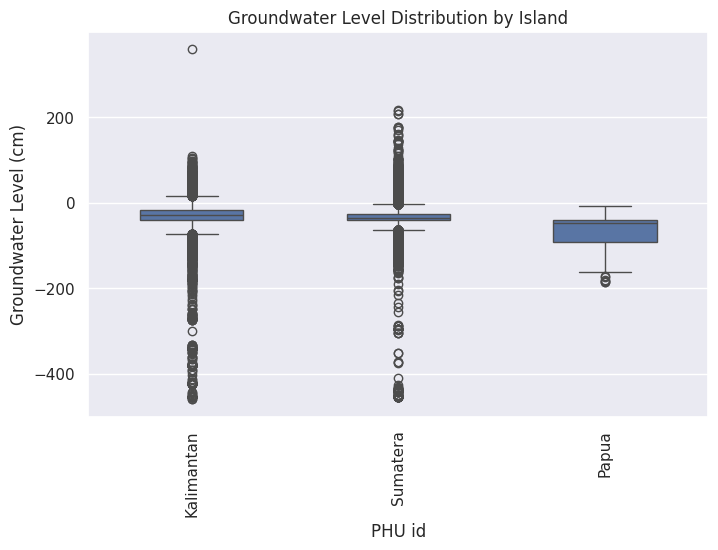

In [69]:
# get a boxplot of response var per island but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="island", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("PHU id")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by Island")
plt.show()

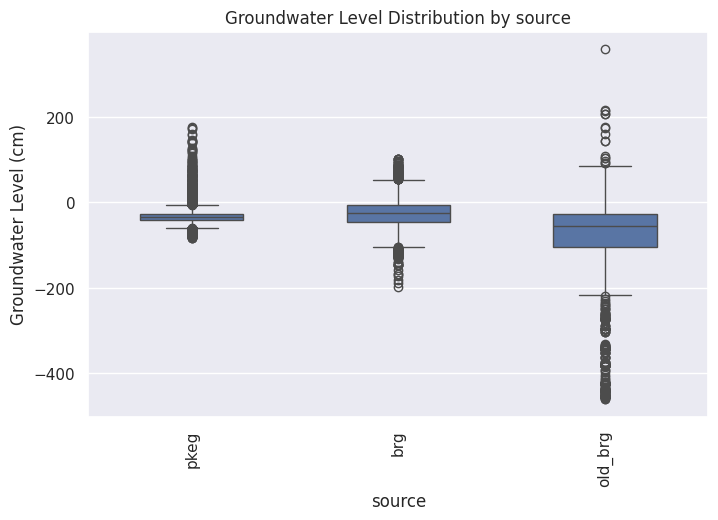

In [70]:
# get a boxplot of response var per source but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="source", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("source")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by source")
plt.show()

Text(0.5, 1.0, 'Groundwater Level Distribution by Province')

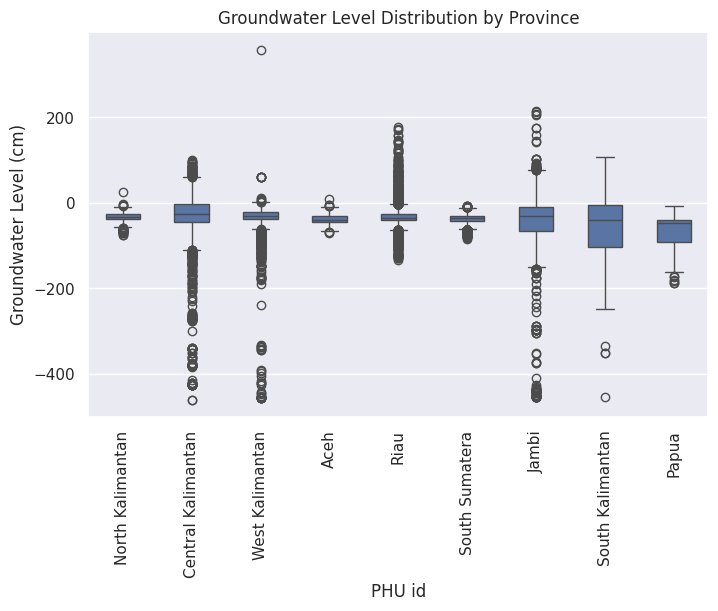

In [71]:
# get a boxplot of response var per province but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="province", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("PHU id")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by Province")

## Create a boxplot showing the number of dates per each point

In [72]:
df.columns

Index(['source', 'id', 'date', 'gwl_cm', 'lat', 'lon', 'LIA', 'VH', 'VV',
       'VVVH_ratio', 'angle', 'sm_1', 'sm_3', 'sm_7', 'sm_30', 'precipitation',
       'prec_3', 'prec_7', 'prec_30', 'elevation', 'aspect', 'slope',
       'land_cov', 'canopy_height', 'gldas_mean', 'gldas_stddev', 'B3', 'B4',
       'B5', 'B7', 'ndvi', 'ndmi', 'ndbri', 'distance', 'dir', 'acc', 'doy',
       'region_id', 'geometry', 'index_right', 'island', 'province',
       'phu_name', 'aoi_phu', 'tile_id', 'phu_id'],
      dtype='object')

In [73]:
# group by id and get the number of dates for each id
group_by = "id"
df_grouped = df.groupby(group_by).count().reset_index()
df_grouped = df_grouped[[group_by, "date"]]
df_grouped.columns = ["name", "date_count"]
df_grouped.sort_values(by="date_count", ascending=False)

,name,date_count
1956,BRG_150710_03,261
1955,BRG_150710_02,255
1945,BRG_140806_01,228
1944,BRG_140802_03,216
779,15_RAPP_PPDVIII-23,212
...,...,...
892,15_RAPP_SKM/XII-10,1
296,10_MTI_MTI_H239_P3,1
893,15_RAPP_SKM/XII-13,1
894,15_RAPP_SKM/XII-14a,1


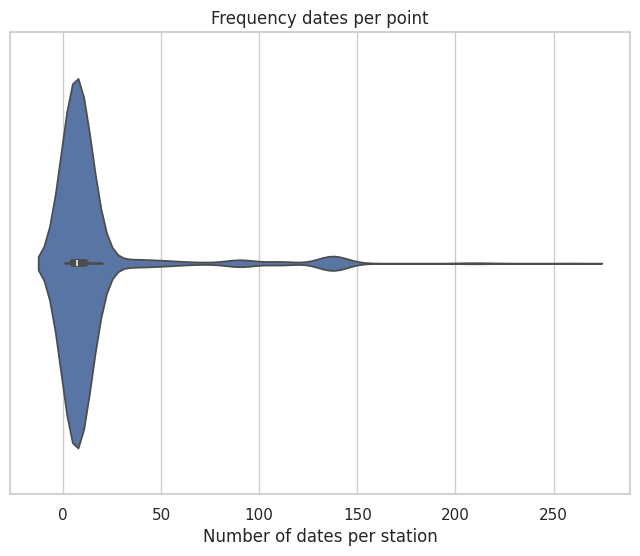

In [74]:
# Define the dimensions of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a violin plot for the variable
sns.violinplot(x=df_grouped["date_count"])

# Set the title and x-axis label
plt.title(f"Frequency dates per point")
plt.xlabel("Number of dates per station")

plt.show()

In [75]:
# drop all stations with less tan 9 observations
min_obs = 9
df.groupby('id').agg({'date': 'count'}).sort_values(by='date', ascending=False).reset_index()
df = df.groupby('id').filter(lambda group: len(group) >= min_obs)

In [76]:
from gee_scripts.parameters import explain_vars, response_var
print("dependent var", response_var)
print("explanatory lenght", len(explain_vars))

dependent var ['gwl_cm']
explanatory lenght 31


# 2. Define a model

## All but one test over stations

In [77]:
from gee_scripts.randomforest import run_randomforest
from gee_scripts.randomforest import get_heatmap

In [78]:
high_corr_ids = pd.read_csv("data/high_corr_0.2_temporal_variables_station_ids.csv")
high_corr_ids.head()

,0
0,15_RAPP_TP-IX-14
1,15_RAPP_TP-XI-16
2,15_RAPP_TP-I-4b
3,15_RAPP_TP-III-2
4,15_RAPP_TP-IV-55


In [ ]:
variable = 'gwl_cm'

high_corr_ids = pd.read_csv("data/high_corr_0.2_temporal_variables_station_ids.csv")
high_corr_ids.columns = ["id"]

training_df = df[
  #  (df.island == "Kalimantan") & don't use the selection by island, the selected stations come from the previous notebook
    df.id.isin(high_corr_ids.id.unique())
]

# Manually selected PHU for training
# high_corr_phu_ids = [
#     136,
#     137,
#     138,
#     143
# ]
# training_df = df[
#     (df.phu_id.isin(high_corr_phu_ids))
# ]

stats_df = run_randomforest(training_df, type_="allbutone")

total points: 3143
total stations: 79
Starting random forest model...


47it [08:12, 10.39s/it]

In [29]:
stats_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
15_RAPP_SKM/I-28,0.445209,7.095745,0.231917,0.077757,0.217218,0.376200,0.491550,0.492700,0.577934,0.223930,0.247341,0.312206,0.294560
15_RAPP_SKM/VII-13a,0.703231,7.474895,0.092747,0.342130,-0.136628,0.265852,0.388456,0.452200,0.649784,0.433006,0.582154,0.603530,0.502312
15_RAPP_SKM/XIV-15a,0.764992,6.209031,-0.154712,0.318423,-0.241625,0.336991,0.437663,0.559567,0.803268,0.272704,0.509966,0.608581,0.495628
15_RAPP_TP-I-22,0.835268,7.124750,-0.296486,-0.217051,-0.238224,0.328864,0.159090,0.343591,0.333719,0.760738,0.511613,0.610971,0.571688
15_RAPP_TP-I-24,0.534913,9.527674,0.195558,0.244101,0.012313,0.272102,0.077476,0.189391,0.467613,0.695391,0.543510,0.660613,0.661137


In [30]:
df.head()

,source,id,date,gwl_cm,lat,lon,LIA,VH,VV,VVVH_ratio,...,doy,region_id,geometry,index_right,island,province,phu_name,aoi_phu,tile_id,phu_id
32,pkeg,02_AHL_SBG-C027,2021-01-08,-38.0,3.91642,117.13584,34.944020,-12.068724,-8.078082,0.093560,...,8,10,POINT (117.13584 3.91642),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
33,pkeg,02_AHL_SBG-C027,2021-03-21,-38.0,3.91642,117.13584,34.947338,-11.666287,-7.412375,0.113317,...,80,10,POINT (117.13584 3.91642),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
34,pkeg,02_AHL_SBG-C027,2021-09-17,-41.0,3.91642,117.13584,34.941146,-14.317974,-8.376357,0.108333,...,260,10,POINT (117.13584 3.91642),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
35,pkeg,02_AHL_SBG-C027,2021-12-22,-38.0,3.91642,117.13584,34.945076,-19.224876,-9.127300,0.110302,...,356,10,POINT (117.13584 3.91642),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0
36,pkeg,02_AHL_SBG-C027,2022-01-27,-38.0,3.91642,117.13584,34.943610,-13.070434,-6.776516,0.160750,...,27,10,POINT (117.13584 3.91642),189.0,Kalimantan,North Kalimantan,KHG Sungai Sebuku - Sungai Sembakung,KAL_User_15,15.0,189.0


<Axes: >

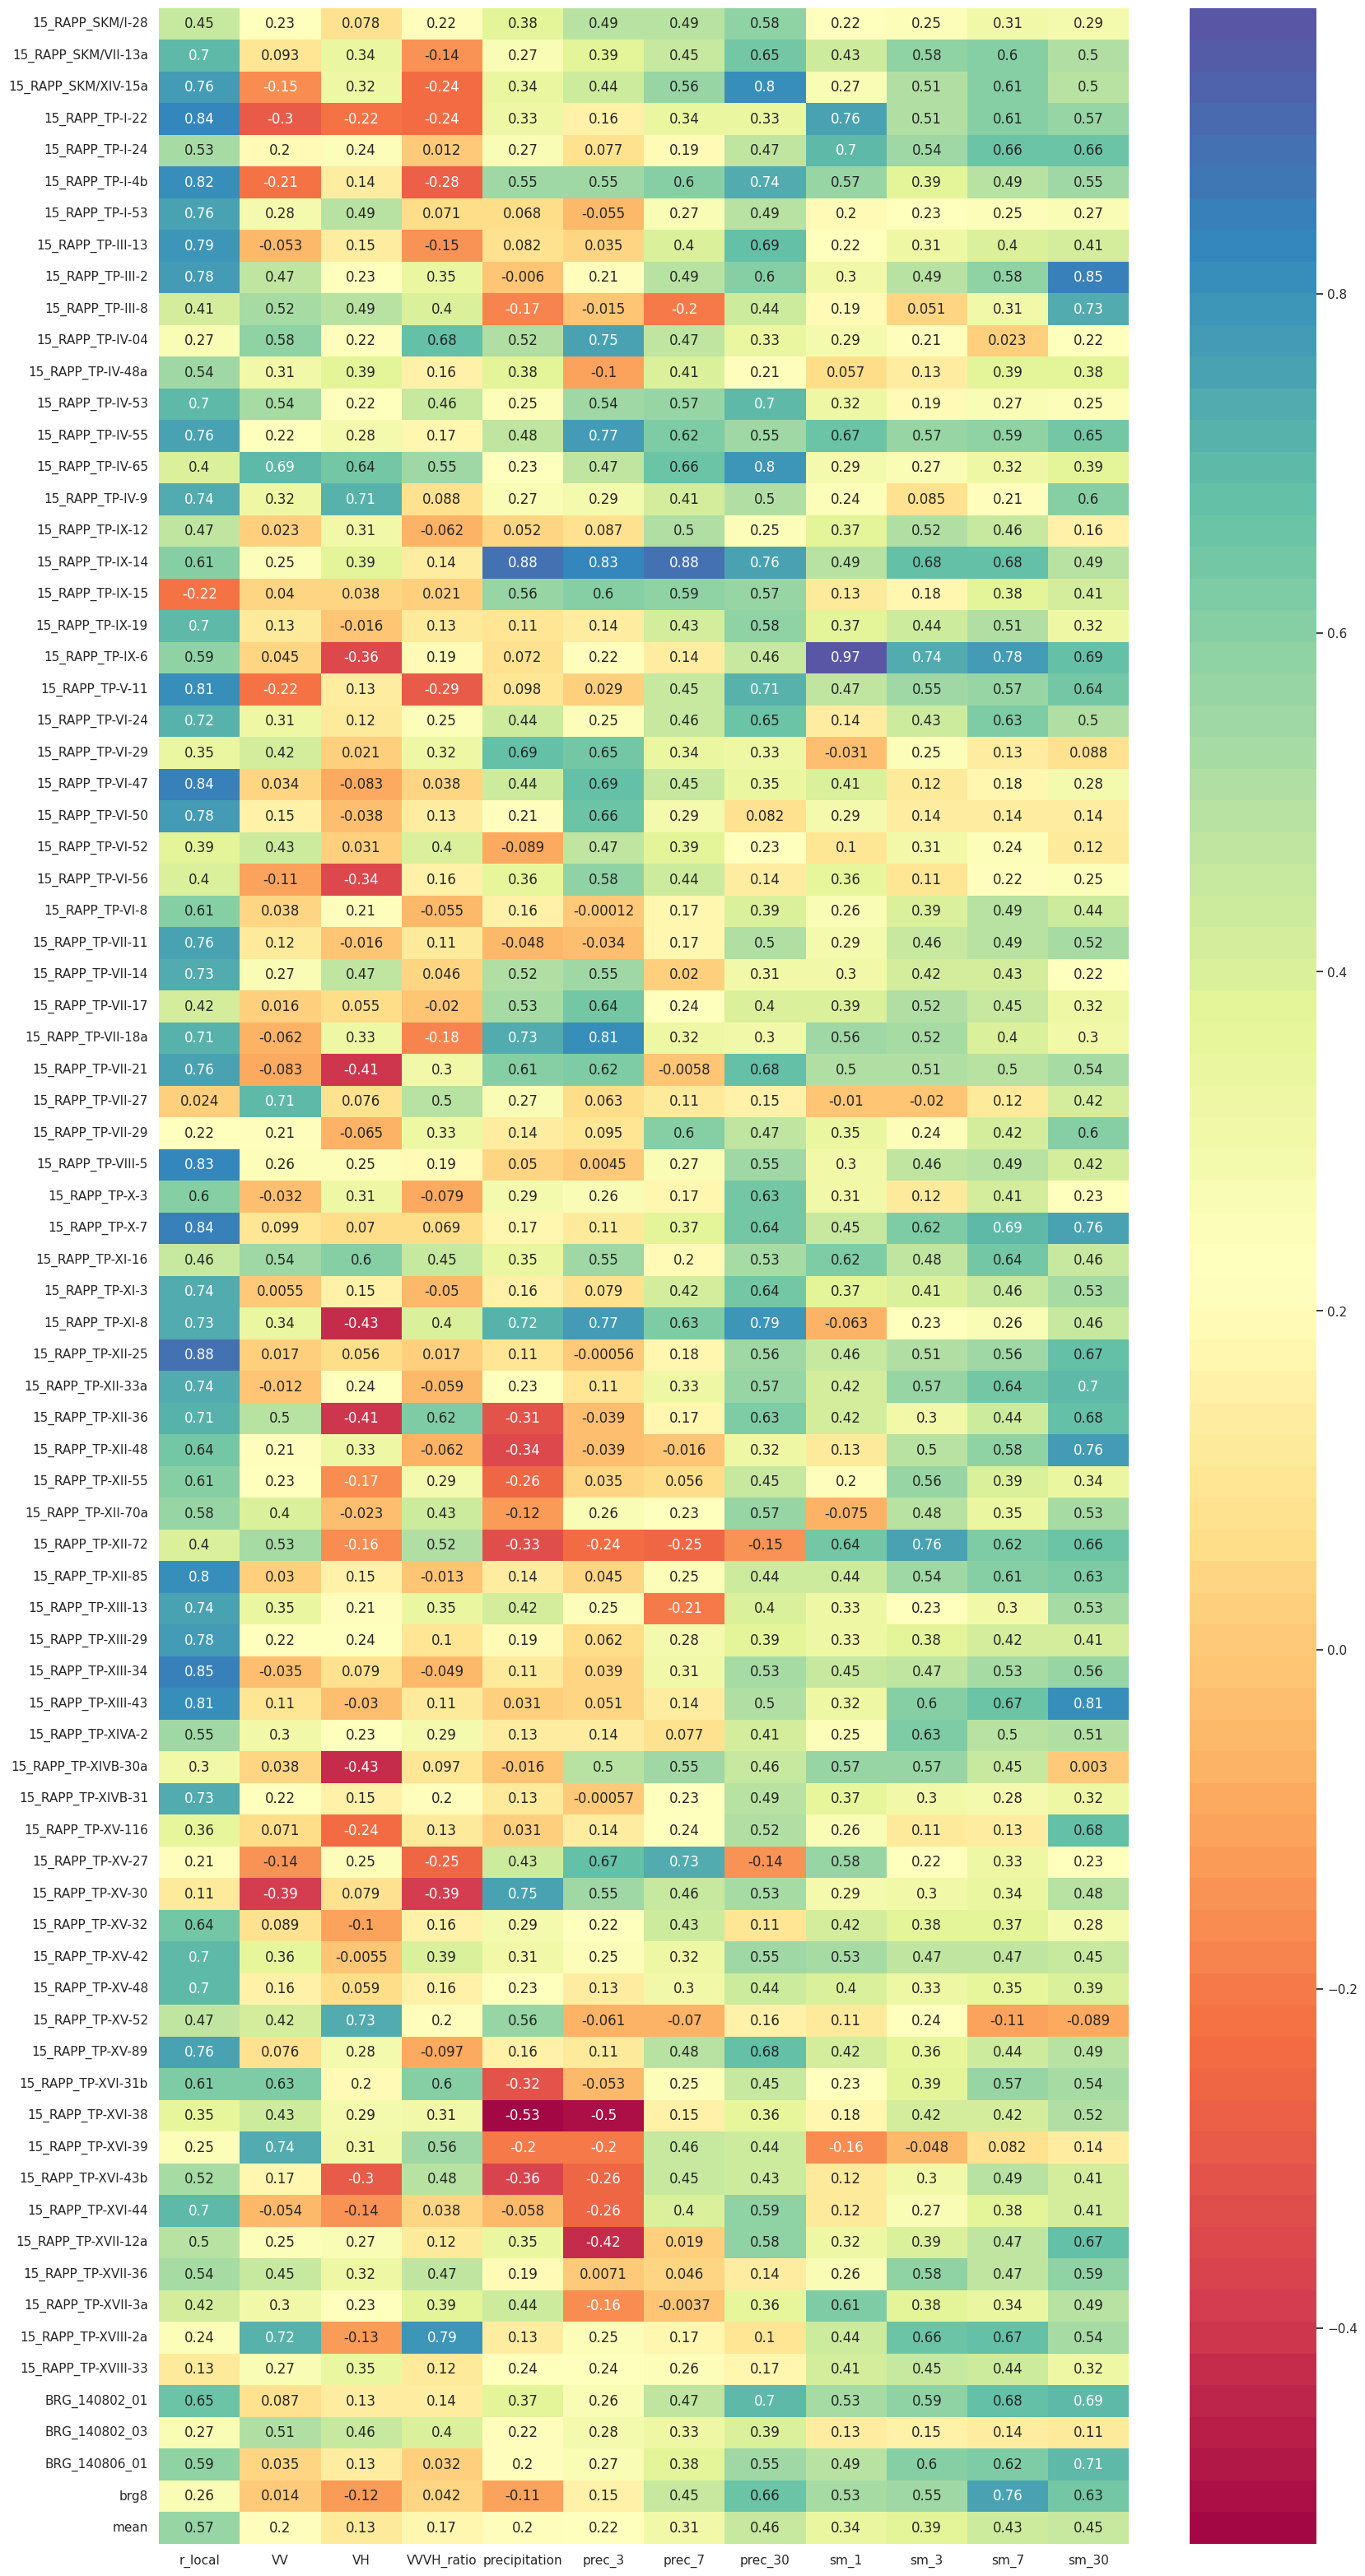

In [31]:
get_heatmap(stats_df, "r_local")

<Axes: title={'center': 'RMSE of stations'}>

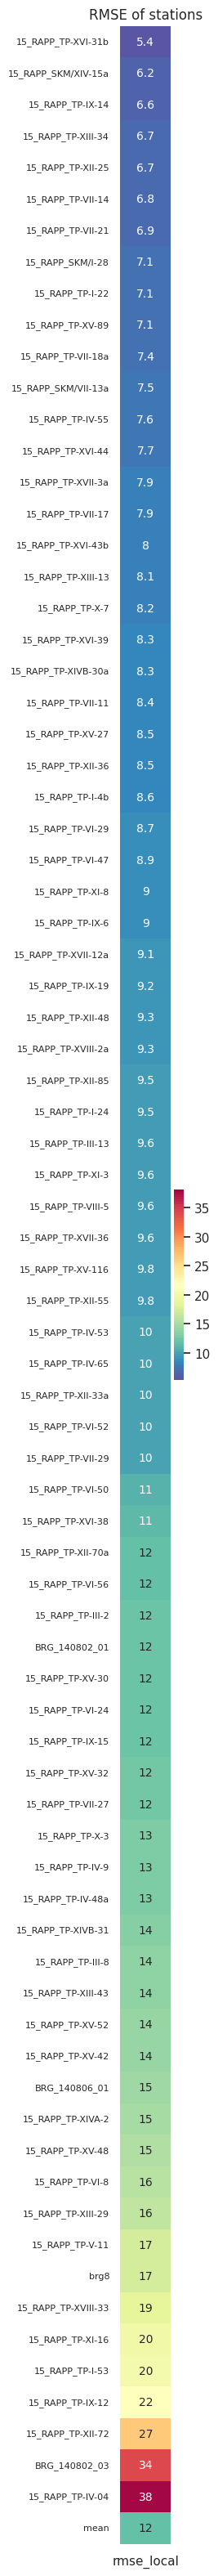

In [32]:
get_heatmap(stats_df, "rmse_local")

## Select best stations

In [33]:
stats_df.columns

Index(['r_local', 'rmse_local', 'VV', 'VH', 'VVVH_ratio', 'precipitation',
       'prec_3', 'prec_7', 'prec_30', 'sm_1', 'sm_3', 'sm_7', 'sm_30'],
      dtype='object')

In [34]:
best_stations = stats_df[stats_df.rmse_local < 15].sort_values(by="r_local", ascending=False).index
best_stations
len(best_stations)

68

## Model with best stations over all stations

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import numpy as np
from gee_scripts.parameters import explain_vars, temporal_expl

In [36]:
# split gdf into good statoins for train
gdf_high = training_df[training_df.id.isin(best_stations)].copy()
# and bad stations for test
gdf_low = training_df[~training_df.id.isin(best_stations)].copy()

variable = 'gwl_cm'

# create and train classifier
regr = get_regressor()
regr.fit(gdf_high[explain_vars], gdf_high[variable])

row = {}
#rmse_list = []
for station in gdf_low.id.unique():
    explans = []
    # apply model to specific station
    gdf_test = gdf_low[gdf_low.id == station]
    y_pred_test = regr.predict(gdf_test[explain_vars])

    # get pearsons r
    r, p = pearsonr(gdf_test[variable].values, y_pred_test)
    explans.append(r)

    explans.append(np.sqrt(mean_squared_error(gdf_test[variable].values, y_pred_test)))

    # add correlation of explanatories
    for expl in temporal_expl:
        explans.append(gdf_test[variable].corr(gdf_test[expl]))
     
    row[station] = explans
    #row[station] = [np.sqrt(mean_squared_error(gdf_test[variable].values, y_pred_test))]
    #print(row)
    
stats_df = pd.DataFrame.from_dict(row, orient='index')

<Axes: >

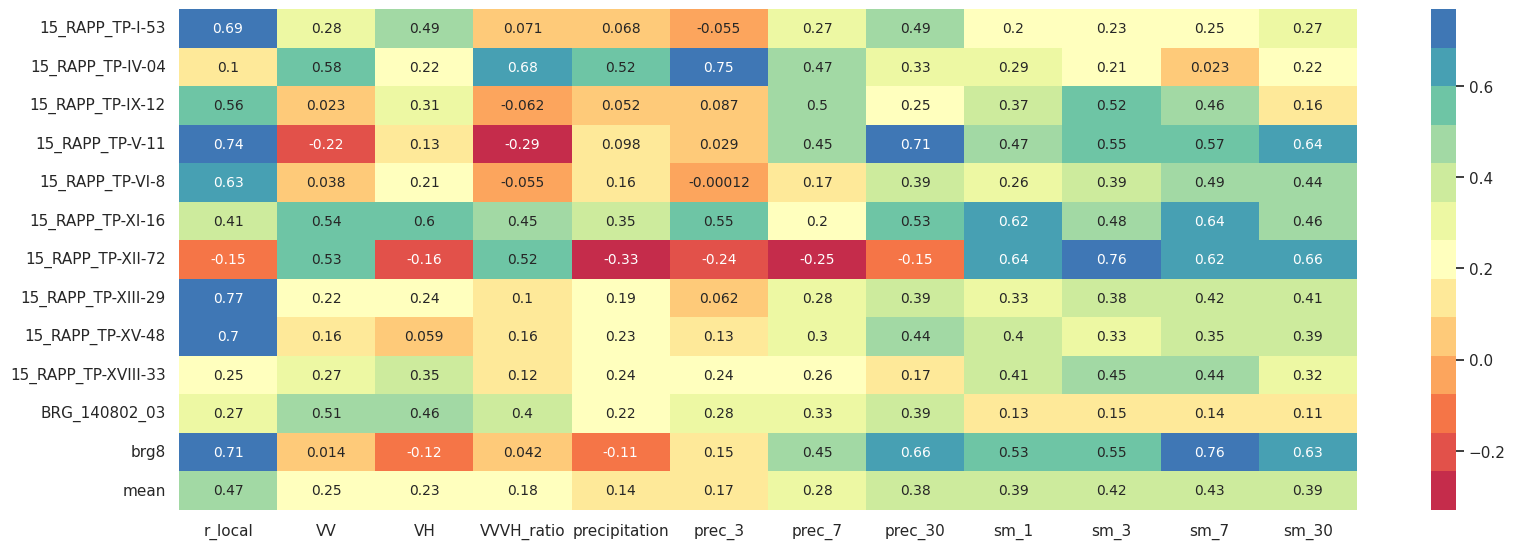

In [37]:
get_heatmap(stats_df, "r_local")

<Axes: title={'center': 'RMSE of stations'}>

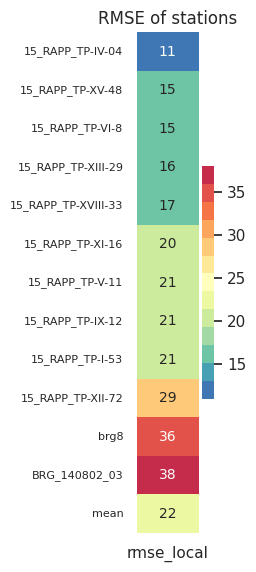

In [38]:
get_heatmap(stats_df, "rmse_local")

In [39]:
best_worse_stations = stats_df[stats_df.rmse_local < 15].index
best_worse_stations

Index(['15_RAPP_TP-IV-04'], dtype='object')

In [40]:
gdf_high.to_file("data/0_shp/kalimantan_best_stations.gpkg", driver="GPKG")
len(gdf_high)

AttributeError: 'DataFrame' object has no attribute 'to_file'

# 3. Final model bootstraping (test different combinations)

The following cells will test different combinations of stations, provinces or phus.
After each bootraping, combination, a result containing the average, min, max and median statistics of the different statistical parameters over all the iterations. 

This result will help to select what is the best combination of stations to produce the final data.

In [41]:
from gee_scripts.randomforest import bootstrap

In [42]:
bootstrap_stations = list(best_stations) # + list(best_worse_stations)
len(bootstrap_stations)

68

### Bootstrap with only best stations

In [43]:
selected_df = training_df[training_df.id.isin(best_stations)]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=5, train_size=0.8)
bootstrap_result

Training with 2280 observations


,mean,min,max,median
r,0.663788,0.635588,0.696168,0.671455
r2,0.407182,0.345772,0.458875,0.437521
rmse,10.914803,9.349621,12.207399,10.758854
samples_train,1789.000000,1722.000000,1846.000000,NaN
samples_test,491.000000,434.000000,558.000000,NaN


### Bootstrap with best + best worse

In [ ]:
selected_df = training_df[training_df.id.isin(list(best_stations) + list(best_worse_stations))]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=5, train_size=0.8)
bootstrap_result

### Bootstrap by PHU

In [44]:
selected_df = df[
    (df.phu_id == 801) #this is the code for 'KHG Sungai Siak - Sungai Kampar'
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

Training with 6689 observations


,mean,min,max,median
r,0.522019,0.476602,0.558586,0.526844
r2,0.251380,0.201502,0.304407,0.260869
rmse,13.357682,11.503774,15.160437,13.057616
samples_train,5474.300000,5346.000000,5654.000000,NaN
samples_test,1214.700000,1035.000000,1343.000000,NaN


### Bootstrap with BRG

In [ ]:
selected_df = df[
    (df.source.isin(["brg", "old_brg"])) & 
    (df.island == "Kalimantan")
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

In [ ]:
selected_df = df[
    (df.source.isin(["brg", "old_brg"])) & 
    (df.island == "Sumatera")
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

### Bootstrap with PKEG

In [ ]:
selected_df = df[
    (df.source.isin(["pkeg"])) & 
    (df.island == "Sumatera")
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

In [ ]:
selected_df = df[
    (df.source.isin(["pkeg"])) & 
    (df.island == "Kalimantan")
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

### Bootstrap by regions

In [ ]:
df.province.unique()

In [ ]:
selected_df = df[
    (df.source.isin(["brg", "brg_old"])) & 
    (df.province == "Central Kalimantan")
]
bootstrap_result = bootstrap(df = selected_df, variable="gwl_cm", iterations=10, train_size=0.8)
bootstrap_result

# 4. Final model selection

After selecting the best combination of stations that present the best model statistics (r, rmse), the following cell can be used to train and store the last model, replace "final_df" with the filters that worked well in the bootraping models.

In [57]:
# Define the filters of the best stations.
df = pd.read_csv("data/9_clean_training_data/clean_training_data.csv")
final_df = df[(df.phu_id == 801)]
final_df

,source,id,date,gwl_cm,lat,lon,LIA,VH,VV,VVVH_ratio,...,doy,region_id,geometry,index_right,island,province,phu_name,aoi_phu,tile_id,phu_id
7848,pkeg,15_RAPP_SKM/I-01,2022-10-11,-39.0,0.305028,102.439110,29.062762,-12.959304,-6.259181,0.186046,...,284,5,POINT (102.43911 0.305028),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
7849,pkeg,15_RAPP_SKM/I-03,2022-07-25,-30.0,0.307994,102.477575,33.545802,-11.299973,-5.685381,0.195930,...,206,5,POINT (102.477575 0.307994),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
7850,pkeg,15_RAPP_SKM/I-03,2023-06-20,-27.0,0.307994,102.477575,31.683857,-13.781031,-7.070433,0.154447,...,171,5,POINT (102.477575 0.307994),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
7851,pkeg,15_RAPP_SKM/I-10a,2022-07-01,-36.0,0.241221,102.562338,31.000254,-14.124071,-9.402499,0.076060,...,182,5,POINT (102.562338 0.241221),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
7852,pkeg,15_RAPP_SKM/I-10a,2022-09-29,-39.0,0.241221,102.562338,33.669268,-13.662934,-10.064578,0.055500,...,272,5,POINT (102.562338 0.241221),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32460,brg,brg8,2021-12-21,-79.7,0.738492,102.390639,37.094582,-15.274118,-8.941208,0.097920,...,355,5,POINT (102.390639 0.738492),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
32461,brg,brg8,2021-12-27,-62.1,0.738492,102.390639,29.868136,-15.050722,-8.564703,0.107909,...,361,5,POINT (102.390639 0.738492),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
32462,brg,brg8,2022-01-14,-67.3,0.738492,102.390639,37.093483,-15.856845,-9.991066,0.074245,...,14,5,POINT (102.390639 0.738492),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0
32463,brg,brg8,2022-01-20,-73.2,0.738492,102.390639,29.868079,-15.464432,-9.339779,0.088003,...,20,5,POINT (102.390639 0.738492),801.0,Sumatera,Riau,KHG Sungai Siak - Sungai Kampar,SUM_User_3,3.0,801.0


In [63]:
#Select only the stations with high correlation or ingest all the station of the PHU in the model
high_corr_ids = pd.read_csv("data/high_corr_0.2_temporal_variables_station_ids.csv")

training_df = df[
  #  (df.island == "Kalimantan") & don't use the selection by island, the selected stations come from the previous notebook
    df.id.isin(high_corr_ids.id.unique())
]

,0
0,15_RAPP_TP-IX-14
1,15_RAPP_TP-XI-16
2,15_RAPP_TP-I-4b
3,15_RAPP_TP-III-2
4,15_RAPP_TP-IV-55
...,...
74,15_RAPP_TP-VI-52
75,15_RAPP_TP-IV-48a
76,15_RAPP_TP-XV-30
77,15_RAPP_TP-VI-8


In [86]:
from gee_scripts.directories import model_path
# Save model to file with not pickle (pickle is not safe) 
import joblib
from sklearn.model_selection import train_test_split
from gee_scripts.parameters import explain_vars, temporal_expl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [165]:
#Choose the df for the model, either high correlation stations or all the stations in a selected PHU

#final_df = df[(df.phu_id == 801)]#To selecT it based on the PHU

#Select only the stations with high correlation or ingest all the station of the PHU in the model
high_corr_ids = pd.read_csv("data/high_corr_0.3_temporal_variables_station_ids.csv")
high_corr_ids.columns = ['id']
#final_df = df[df['id'].isin(high_corr_ids)]
final_df = df[df.id.isin(high_corr_ids.id.unique())]#To selecT it based on correlations
len(final_df)

509

In [166]:
# Split the dataset into features (X) and target variable (y)
X = final_df.drop(columns=['gwl_cm'])  # Replace 'target_column' with the name of your target column
y = final_df['gwl_cm']

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train and y_train contain 70% of the data for training
# X_test and y_test contain 30% of the data for testing
len(X_train)

356

In [167]:
variable = 'gwl_cm'

# Define the filters of the best stations.
final_df = df[
    (df.phu_id == 801)
]

regr = get_regressor()
regr.fit(X_train[explain_vars], y_train)

# Define a name for this model, it will be overwritten if there's something before
model_name = "model_sungai_siak_sungai_kampar_phu_0.3_corr_0.3.joblib"
joblib.dump(regr, model_path/model_name)

['data/10_models/model_sungai_siak_sungai_kampar_phu_0.3_corr_0.3.joblib']

In [168]:
# Make predictions
predictions = regr.predict(X_test[explain_vars])

/tmp/ipykernel_447/1205247995.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')


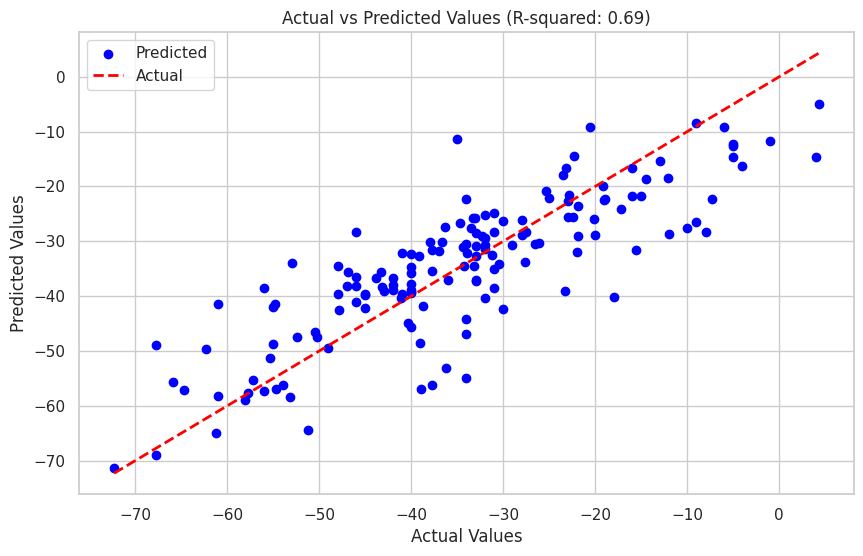

In [169]:
# Assuming you have trained your RandomForestRegressor model and made predictions
# rf_regressor.fit(X_train, y_train)  # Assuming you've trained the model already
# predictions = rf_regressor.predict(X_test)  # Assuming you've made predictions already

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, predictions)

# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (R-squared: {:.2f})'.format(r2))
plt.legend()
plt.grid(True)
plt.show()